                                                       # Housing Price Prediction                                                              

## We will create a Supervised Machine Learning model--Regression Model.


This dataset contains detailed information on residential property prices in India. It includes features such as the number of bedrooms and bathrooms, living and lot area, number of floors, waterfront presence, house condition and grade, construction and renovation years, and geographic coordinates. Additional features include the number of nearby schools, distance from the airport, and property price. This dataset is ideal for real estate market analysis and predictive modeling, providing insights into factors influencing property prices across different regions in India.

Import Important Libraries

In [1]:
!pip install seaborn pandas numpy matplotlib sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

# Load The Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/House_Price_India.csv')

# Display The Data

In [4]:
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


## New SweetViz Report

                                             |          | [  0%]   00:00 -> (? left)

Error generating SweetViz report: module 'numpy' has no attribute 'VisibleDeprecationWarning'
Falling back to basic pandas profiling...

=== DATASET OVERVIEW ===
Dataset shape: (14619, 23)
Columns: ['id', 'Date', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price']

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                     

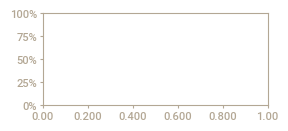

In [5]:
# Generate the SweetViz report for House Price dataset
try:
    # Generate the report
    report = sv.analyze(df, target_feat='Price')
    
    # Save the report to an HTML file with a proper filename
    report.show_html("house_price_india_report.html")
    
    # Display the report in the Jupyter Notebook
    report.show_notebook()
    
    print("SweetViz report generated successfully!")
    print("HTML report saved as: house_price_india_report.html")
    
except Exception as e:
    print(f"Error generating SweetViz report: {e}")
    print("Falling back to basic pandas profiling...")
    
    # Basic data overview as fallback
    print("\n=== DATASET OVERVIEW ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print("\n=== DATA INFO ===")
    print(df.info())
    print("\n=== BASIC STATISTICS ===")
    print(df.describe())
    print("\n=== MISSING VALUES ===")
    print(df.isnull().sum())

In [6]:
# # Generate the report
# report = sv.analyze(df)

In [7]:
# # Save the report to an HTML file
# report.show_html("euro_2024_football_tournament_report.html")

In [8]:
# # To display the report in a Jupyter Notebook
# report.show_notebook()

In [9]:
df.tail(7)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14612,6762829600,42734,3,1.00,1400,10425,1.0,0,0,4,...,1968,0,122040,52.5038,-114.491,1440,10425,2,59,241500
14613,6762829669,42734,3,1.75,1590,7931,1.0,0,0,3,...,1979,0,122024,52.5928,-114.240,1680,7931,1,80,240000
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14618,6762831463,42734,3,1.00,900,4770,1.0,0,0,3,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


# Preprocessing

<Axes: >

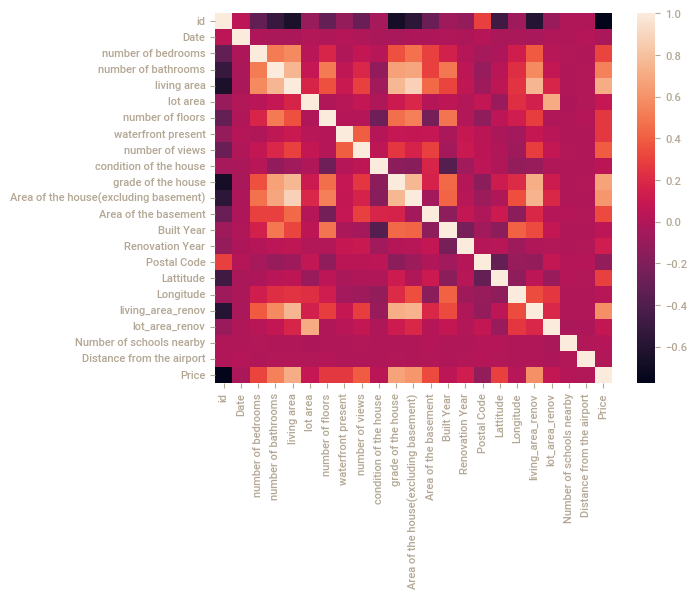

In [10]:
sns.heatmap(df.corr())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [12]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [13]:
df.shape

(14619, 23)

# Check For Null Values

In [14]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

As The Data is Cleaned so check for Duplicates


In [15]:
df.duplicated().sum() 

np.int64(0)

No duplicates found.

# Data is Cleaned and ready for analysis

In [16]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [17]:
print("\nColumn names and data types:")
print(df.dtypes)


Column names and data types:
id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                         

### Remove Unnecessary Columns

In [18]:
df = df.drop(['id', 'Date', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov'], axis=1)

# Or using columns parameter (more explicit)
# df = df.drop(columns=['column1', 'column2', 'column3'])

In [19]:
df

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Number of schools nearby,Distance from the airport,Price
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,2,51,1400000
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,1,53,1200000
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,3,76,838000
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,1,51,805000
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,122066,3,76,221700
14615,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,122072,3,59,219200
14616,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,122056,2,64,209000
14617,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,3,54,205000


# Feature 1: Total rooms (bedrooms + bathrooms)

In [20]:

df['total_rooms'] = df['number of bathrooms'] + df['number of bedrooms']


In [21]:
df

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Number of schools nearby,Distance from the airport,Price,total_rooms
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,2,51,1400000,6.50
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,1,53,1200000,7.75
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,3,76,838000,6.50
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,1,51,805000,5.00
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,1,67,790000,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,122066,3,76,221700,3.50
14615,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,122072,3,59,219200,5.00
14616,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,122056,2,64,209000,3.00
14617,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,3,54,205000,5.00


# Feature 2: Price per square foot of living area


In [22]:
df['price_per_sqft_living'] = df['Price'] / df['living area']
df


,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Number of schools nearby,Distance from the airport,Price,total_rooms,price_per_sqft_living
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,2,51,1400000,6.50,479.452055
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,1,53,1200000,7.75,412.371134
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,3,76,838000,6.50,253.172205
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,1,51,805000,5.00,297.047970
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,1,67,790000,5.50,303.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,122066,3,76,221700,3.50,142.480720
14615,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,122072,3,59,219200,5.00,130.476190
14616,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,122056,2,64,209000,3.00,195.327103
14617,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,3,54,205000,5.00,199.029126


# Feature 4: Age of the house (current year - year built)

In [23]:

current_year = 2024
df['house_age'] = current_year - df['Built Year']


In [24]:
df

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Number of schools nearby,Distance from the airport,Price,total_rooms,price_per_sqft_living,house_age
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,2,51,1400000,6.50,479.452055,115
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,1,53,1200000,7.75,412.371134,85
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,3,76,838000,6.50,253.172205,23
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,1,51,805000,5.00,297.047970,95
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,1,67,790000,5.50,303.846154,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,122066,3,76,221700,3.50,142.480720,67
14615,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,122072,3,59,219200,5.00,130.476190,56
14616,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,122056,2,64,209000,3.00,195.327103,62
14617,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,3,54,205000,5.00,199.029126,69


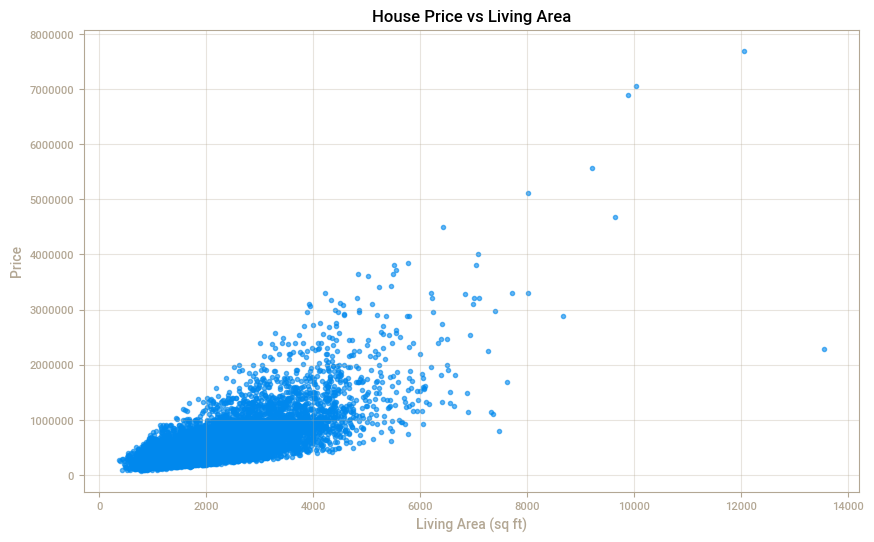

In [25]:

plt.figure(figsize=(10, 6))
plt.scatter(df['living area'], df['Price'], alpha=0.6)
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price')
plt.title('House Price vs Living Area')
plt.grid(True, alpha=0.3)
plt.show()

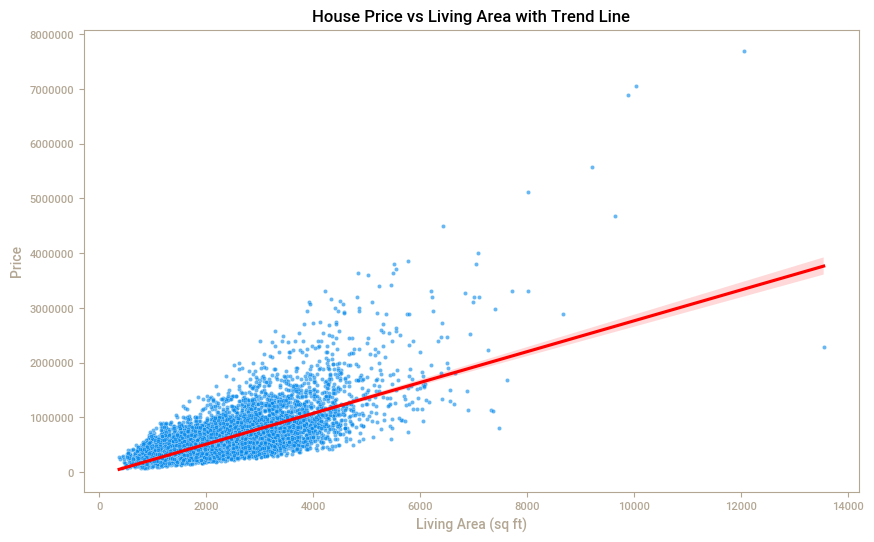

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='living area', y='Price', alpha=0.6)
sns.regplot(data=df, x='living area', y='Price', scatter=False, color='red')
plt.title('House Price vs Living Area with Trend Line')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price')
plt.show()

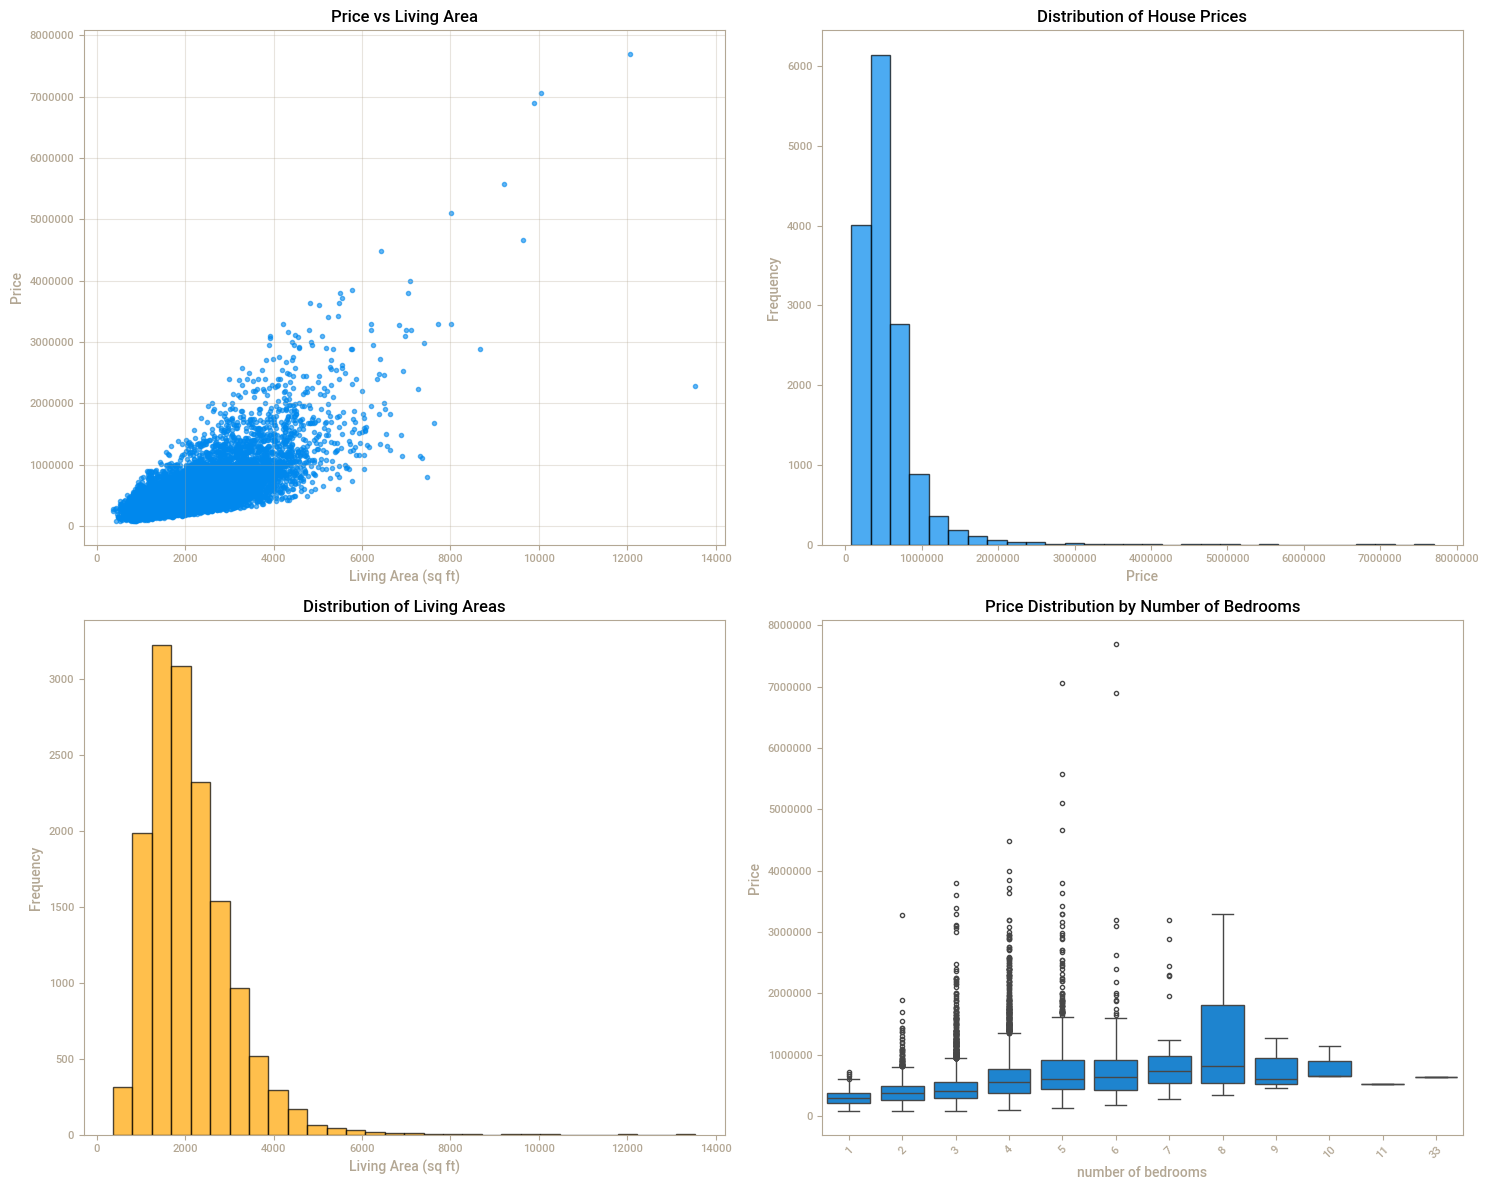

In [27]:
# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot
axes[0, 0].scatter(df['living area'], df['Price'], alpha=0.6)
axes[0, 0].set_xlabel('Living Area (sq ft)')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Price vs Living Area')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram of prices
axes[0, 1].hist(df['Price'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of House Prices')

# 3. Histogram of living areas
axes[1, 0].hist(df['living area'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Living Area (sq ft)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Living Areas')

# 4. Box plot of price by number of bedrooms
sns.boxplot(data=df, x='number of bedrooms', y='Price', ax=axes[1, 1])
axes[1, 1].set_title('Price Distribution by Number of Bedrooms')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [28]:
df

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Number of schools nearby,Distance from the airport,Price,total_rooms,price_per_sqft_living,house_age
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,2,51,1400000,6.50,479.452055,115
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,1,53,1200000,7.75,412.371134,85
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,3,76,838000,6.50,253.172205,23
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,1,51,805000,5.00,297.047970,95
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,1,67,790000,5.50,303.846154,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,122066,3,76,221700,3.50,142.480720,67
14615,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,122072,3,59,219200,5.00,130.476190,56
14616,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,122056,2,64,209000,3.00,195.327103,62
14617,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,3,54,205000,5.00,199.029126,69


In [29]:
df = df.drop(['Postal Code','Area of the basement','Built Year','Renovation Year', 'price_per_sqft_living'], axis=1)

In [30]:
df

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Number of schools nearby,Distance from the airport,Price,total_rooms,house_age
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,2,51,1400000,6.50,115
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,1,53,1200000,7.75,85
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,3,76,838000,6.50,23
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,1,51,805000,5.00,95
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,1,67,790000,5.50,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1.50,1556,20000,1.0,0,0,4,7,1556,3,76,221700,3.50,67
14615,3,2.00,1680,7000,1.5,0,0,4,7,1680,3,59,219200,5.00,56
14616,2,1.00,1070,6120,1.0,0,0,3,6,1070,2,64,209000,3.00,62
14617,4,1.00,1030,6621,1.0,0,0,4,6,1030,3,54,205000,5.00,69


# Split The DataSet For Traning

In [31]:
# save the cleaned dataset to a new CSV file
# df.to_csv('Cleaned_Dataset_Housing_Price_Prediction.csv', index=False)

In [32]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Number of schools nearby,Distance from the airport,Price,total_rooms,house_age
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,2,51,1400000,6.50,115
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,1,53,1200000,7.75,85
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,3,76,838000,6.50,23
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,1,51,805000,5.00,95
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,1,67,790000,5.50,73


In [33]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [34]:
train, test = train_test_split(df, test_size=0.25)
print("Train shape:", train.shape) # Divide into 25 and 75 percent
print("Test shape:", test.shape)

Train shape: (10964, 15)
Test shape: (3655, 15)


In [35]:
df.head(2)

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Number of schools nearby,Distance from the airport,Price,total_rooms,house_age
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,2,51,1400000,6.50,115
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,1,53,1200000,7.75,85


In [36]:
train_x = train.drop(columns=['Price'])
train_y = train['Price']

test_x = test.drop(columns=['Price'])
test_y = test['Price']

In [37]:
train_x.shape

(10964, 14)

In [38]:
train_y.shape

(10964,)

In [39]:

test_x.shape


(3655, 14)

In [40]:
test_y.shape

(3655,)

<Axes: >

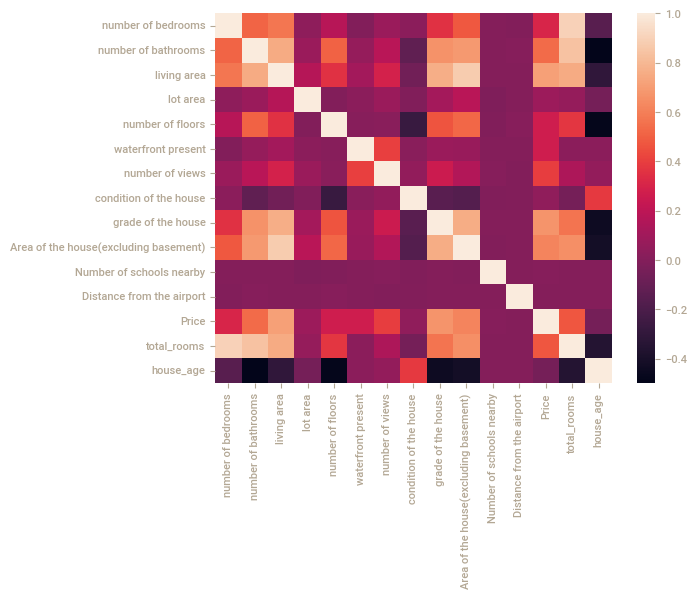

In [41]:
sns.heatmap(df.corr())

# Model Evalution

In [42]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(train_x, train_y)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
# Make predictions on the test set
predictions = model.predict(test_x)



In [44]:
# Evaluate the model using metrics
mae = metrics.mean_absolute_error(test_y, predictions)
mse = metrics.mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)

Mean Absolute Error :  139859.43625437858
Mean Squared Error :  45726305604.46541
Root Mean Squared Error :  213837.1006267748



## Mean Absolute Error (MAE): 
* This tells you the average magnitude of the errors in the same units as your house prices. So, an MAE of approximately 68,000 means that, on average, the model's predictions are off by about ₹68,000. 
## Root Mean Squared Error (RMSE):
* This is also in the same units as your house prices. An RMSE of approximately 126,000 means that the typical prediction error is around ₹126,000. The RMSE is usually larger than the MAE because it penalizes larger errors more.



In [45]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Calculate metrics
r2 = r2_score(test_y, predictions)
rmse = np.sqrt(mean_squared_error(test_y, predictions))

print(f"R-squared: {r2:.4f}")
print(f"RMSE: ${rmse:,.2f}")

R-squared: 0.6630
RMSE: $213,837.10


An R 
2
  of 0 means your model is no better than just guessing the average price every time.

An R 
2
  of 1 means your model perfectly predicts the prices.

R-squared: 0.67
This is the most important score here. It means your model can explain about 67% of the variation in house prices. While this is much better than random guessing (which would be an R-squared of 0), a "good" model for this problem is typically above 0.75 or 0.80.

In [47]:
# Get input from the user for each feature in train_x.columns
input_data = {}
for col in train_x.columns:
    value = input(f"Enter value for '{col}': ")
    # Attempt to convert to appropriate type (int or float)
    try:
        if '.' in value:
            input_data[col] = float(value)
        else:
            input_data[col] = int(value)
    except ValueError:
        print(f"Invalid input for '{col}'. Please enter a number.")
        input_data[col] = None # Handle invalid input

# Create a DataFrame from the input data
# Ensure the order of columns matches train_x.columns
sample_input_live = pd.DataFrame([input_data], columns=train_x.columns)

# Remove columns with None values due to invalid input
sample_input_live = sample_input_live.dropna()

if not sample_input_live.empty:
    # Predict the price using the Linear Regression model
    predicted_price_live = model.predict(sample_input_live)

    print(f"\nPredicted house price based on your input: {predicted_price_live[0]:,.2f}")
else:
    print("\nCould not predict due to invalid input.")


Predicted house price based on your input: 1,433,712.89


# Save The Model

In [49]:
import joblib

# Save the trained Linear Regression model
filename = 'linear_regression_model.pkl'
joblib.dump(model, filename)

print(f"Model saved as {filename}")

Model saved as linear_regression_model.pkl


In [53]:
import pickle
from sklearn.linear_model import LinearRegression
# 1. Open a file where you want to store the data
with open('house_price_model.pkl', 'wb') as file:

    # 2. Dump the model object into the file
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


In [54]:
import pickle

# 1. Open the saved file in "read binary" mode
with open('house_price_model.pkl', 'rb') as file:

    # 2. Load the model object from the file
    loaded_model = pickle.load(file)

# Now 'loaded_model' is ready to be used for predictions
# For example:
# predictions = loaded_model.predict(new_data)

In [ ]:
# model.fit(train_x, train_y)
# joblib.dump(model, 'House_Price.pkl') #save the model to a file
# print("Model saved as 'House_Price.pkl")

# By:- Lucky Sharma